# Slab Detachment Benchmark

version 0.1 Romain Beucher romain.beucher@anu.edu.au

In [1]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /home/romain/Projects/Project_Surface_processes/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
half_rate = 1.8 * u.centimeter / u.year
model_length = 660. * u.kilometer
model_width = 1000. * u.kilometer
surfaceTemp = 273.15 * u.degK
baseModelTemp = 1603.15 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-500. * u.kilometer, -660. * u.kilometer), 
                  maxCoord=(500. * u.kilometer, 0. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
Model.minViscosity = 1e21 * u.pascal * u.second
Model.maxViscosity = 1e25 * u.pascal * u.second

In [6]:
polygon = GEO.shapes.Polygon([(-500. * u.kilometer, 0. * u.kilometer),
                              (-500. * u.kilometer, -80. * u.kilometer),
                              (-40. * u.kilometer, -80. * u.kilometer),
                              (-40. * u.kilometer, -330. * u.kilometer),
                              (40. * u.kilometer, -330. * u.kilometer),
                              (40. * u.kilometer, -80. * u.kilometer),
                              (500. * u.kilometer, -80. * u.kilometer),
                              (500. * u.kilometer, 0. * u.kilometer)])

In [7]:
Mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
Lithosphere = Model.add_material(name="Lithosphere", shape=polygon)

In [8]:
Mantle.density = 3150. * u.kilogram / u.metre**3
Lithosphere.density = 3300. * u.kilogram / u.metre**3

In [9]:
Mantle.viscosity = GEO.ViscousCreep(preExponentialFactor=5.0e-22 * u.pascal**-1 * u.second**-1, 
                                    stressExponent=1., 
                                    activationVolume=0.0,
                                    activationEnergy=0.0)

Lithosphere.viscosity = GEO.ViscousCreep(preExponentialFactor=1.23e-48 * u.pascal**-4 * u.second**-1, 
                                         stressExponent=4., 
                                         activationVolume=0.0,
                                         activationEnergy=0.0)


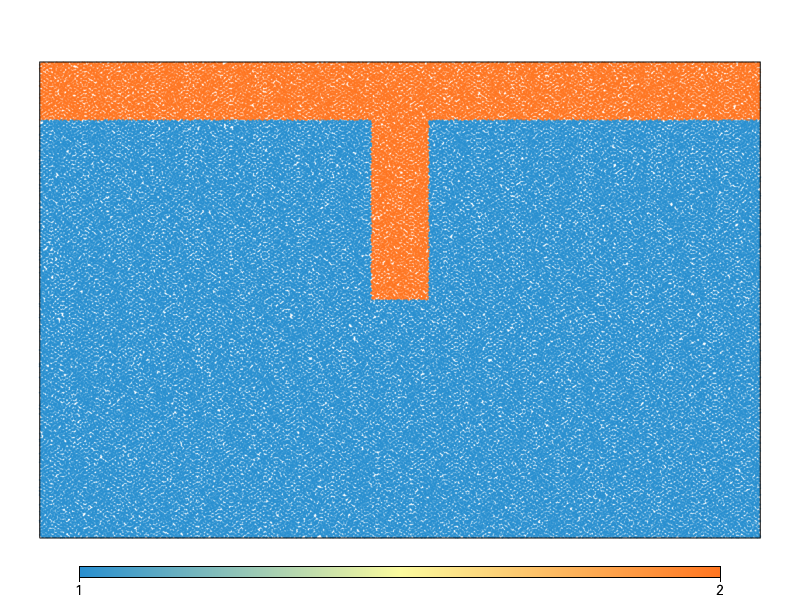

In [10]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.materialField, fn_size=3)
Fig.show()

In [11]:
import numpy as np

npoints = 10

y = np.linspace(GEO.nd(-330. * u.kilometer), GEO.nd(-80. * u.kilometer), npoints)

coords = np.ndarray((npoints, 2))

coords[:, 0] = GEO.nd(-40 * u.km)
coords[:, 1] = y
Model.add_passive_tracers(name="left", vertices=coords)

coords[:, 0] = GEO.nd(40 * u.km)
Model.add_passive_tracers(name="right", vertices=coords)


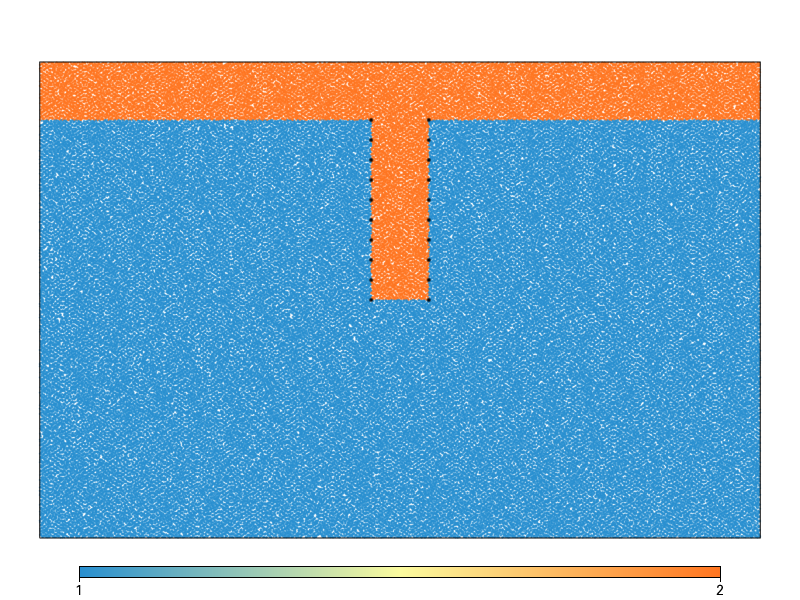

In [12]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.left_tracers, pointSize=5.0)
Fig.Points(Model.right_tracers, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()

In [13]:
Model.set_velocityBCs(left=[0., 0.], right=[0., 0.], bottom=[None, 0.], top=[None, 0.])

In [14]:
Model.init_model(pressure="lithostatic")

/home/romain/Projects/Project_Surface_processes/UWGeodynamics/UWGeodynamics/_model.py:1527: UserWarning: You have not passed anything to the temperature argument. The temperature field will not be initialised
  warnings.warn("You have not passed anything to the temperature argument. The temperature field will not be initialised")



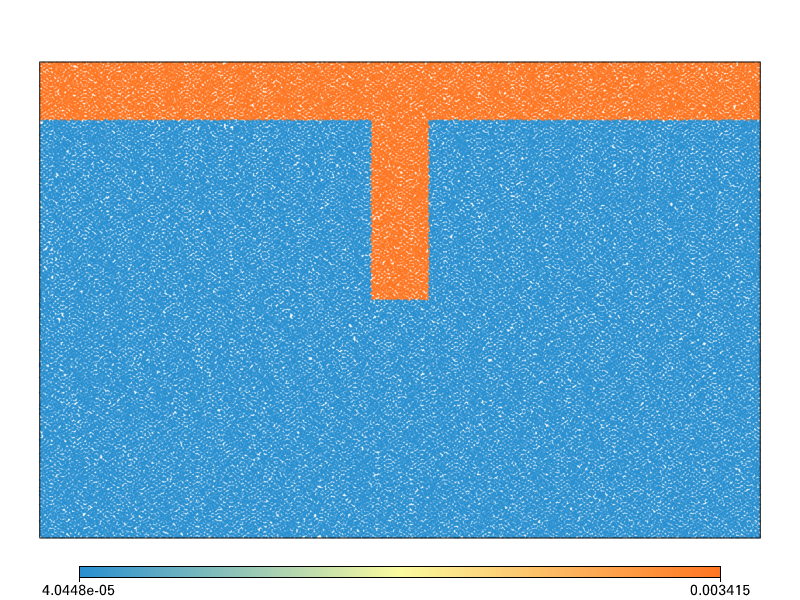

In [15]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.viscosityField, fn_size=3.0)
Fig.show()

In [16]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
GEO.rcParams["nonlinear.tolerance"] = 1e-5
GEO.rcParams["nonlinear.max.iterations"] = 50

In [19]:
Model.run_for(nstep=10)

Running with UWGeodynamics version 2.10.5
Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type GMG -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type preonly -A11_pc_type lu -A11_pc_factor_mat_solver_type mumps -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 5.5 megayear dt: 2.4 megayear (2021-02-19 10:51:29)
Step:     2 Model Time: 7.5 megayear dt: 1.9 megayear (2021-02-19 10:51:36)
Step:     3 Model Time: 9.4 megayear dt: 1.9 megayear (2021-02-19 10:51:42)
Step:     4 Model Time: 10.9 megayear dt: 1.5 megayear (2021-02-19 10:51:49)
Step:     5 Model Time: 12.2 megayear dt: 1.4 megayear (2021-02-19 10:51:56)
Step:     6 Model Time: 13.4 megayear dt: 1.1 megayear (2021-02-19 10:52:02)
Step:     7 Model Time: 14.3 megayear dt: 989812.1 year (2021-02-19 10:52:08)
Step:     8 Model Time: 15.2 megayear dt: 865

1


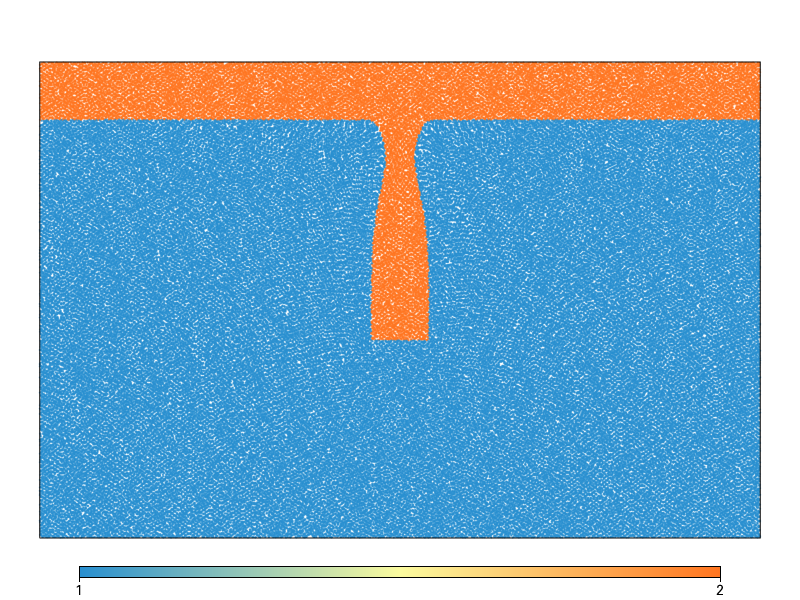

In [21]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()